<a href="https://colab.research.google.com/github/lorek/MethodsClassDimRed/blob/main/MoCaDR_List_nr_12_CNN_LeNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NOTEBOOK NO 12, CNN LeNet5


**NOTE: THIS SCRIPT IS NOT POLISHED**

In [ ]:
import keras
import keras.utils
from keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Flatten, Dense, Activation
import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


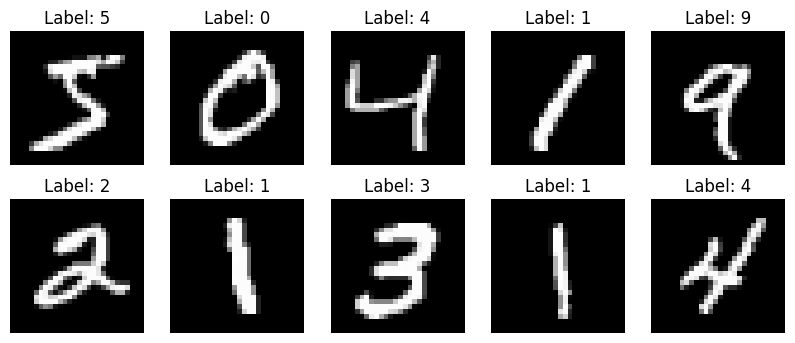

In [ ]:
plt.figure(figsize=(10, 4))  #
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [ ]:
# Consider The First 50000 samples As The Training Dataset
x_train_main = x_train[:50000]
y_train_main = y_train[:50000]

# Conside The Last 10000 Samples AS The Validation Dataset
x_val = x_train[50000:]
y_val = y_train[50000:]

In [ ]:
x_train_main = x_train_main / 255.0
x_val=x_val/255.0
x_test = x_test / 255.0

x_train_main = x_train_main.reshape(50000, 28, 28, 1)
x_val = x_val.reshape(10000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [ ]:
x_train_main.shape


(50000, 28, 28, 1)

In [ ]:
y_train_main[0]

5

In [ ]:
# one hot encoding

In [ ]:
y_train_main = keras.utils.to_categorical(y_train_main, 10)
y_val = keras.utils.to_categorical(y_val, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
y_train_main[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
num_classes=10

# Simple MLP

In [ ]:
model_mlp = keras.Sequential(
    [
        # dense, 256
        layers.Dense(256, input_shape=(28*28,), activation='relu'),
        #layers.Dropout(0.2),
        layers.Dense(256, activation='relu'),
        #layers.Dropout(0.2),
        # output layer. the number of output should be your number of classification
        layers.Dense(num_classes, activation='softmax')
    ]
);

In [ ]:
model_mlp.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               200960    
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_mlp.fit(
    x_train_main.reshape(50000, 28 * 28), y_train_main,
    epochs=20, batch_size=128, validation_data=(x_val.reshape(10000, 28 * 28), y_val)
)

Epoch 1/20
391/391 [==============================] - 5s 9ms/step - loss: 0.2851 - accuracy: 0.9167 - val_loss: 0.1367 - val_accuracy: 0.9589
Epoch 2/20
391/391 [==============================] - 4s 10ms/step - loss: 0.1079 - accuracy: 0.9672 - val_loss: 0.0980 - val_accuracy: 0.9701
Epoch 3/20
391/391 [==============================] - 4s 10ms/step - loss: 0.0689 - accuracy: 0.9789 - val_loss: 0.0981 - val_accuracy: 0.9696
Epoch 4/20
391/391 [==============================] - 3s 8ms/step - loss: 0.0483 - accuracy: 0.9855 - val_loss: 0.0773 - val_accuracy: 0.9780
Epoch 5/20
391/391 [==============================] - 3s 8ms/step - loss: 0.0353 - accuracy: 0.9893 - val_loss: 0.0768 - val_accuracy: 0.9768
Epoch 6/20
391/391 [==============================] - 5s 12ms/step - loss: 0.0248 - accuracy: 0.9924 - val_loss: 0.0837 - val_accuracy: 0.9771
Epoch 7/20
391/391 [==============================] - 4s 9ms/step - loss: 0.0233 - accuracy: 0.9923 - val_loss: 0.0753 - val_accuracy: 0.9797
Epo

In [ ]:
mlp_test_loss, mlp_test_accuracy = model_mlp.evaluate(x_test.reshape(10000, 28 * 28), y_test)
print(f'MLP: Test loss: {mlp_test_loss:.4f}, Test accuracy: {mlp_test_accuracy:.4f}')

313/313 [==============================] - 1s 3ms/step - loss: 0.1104 - accuracy: 0.9768
MLP: Test loss: 0.1104, Test accuracy: 0.9768


In [ ]:
print(x_train_main[0].shape, "\n", y_train_main.shape)
print(x_train_main.shape, "\n", y_train_main.shape)


(28, 28, 1) 
 (50000, 10)
(50000, 28, 28, 1) 
 (50000, 10)


# Conv2D, AveragePooling2D, Flatten

# Conv2D:

https://miro.medium.com/v2/resize:fit:1100/format:webp/1*ulfFYH5HbWpLTIfuebj5mQ.gif

# LeNet5

In [ ]:
#Create An Instance of Sequential Class.
LeNet5_Model=Sequential()

LeNet5_Model.add(Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1)))

# Add First Average Pooling Layer
LeNet5_Model.add(AveragePooling2D((2, 2)))

# Add Second Convolutional Layer
LeNet5_Model.add(Conv2D(16, kernel_size=(5, 5), activation='tanh'))

# Add Second Average Pooling Layer
LeNet5_Model.add(AveragePooling2D((2, 2)))

# Flatten The Layer
LeNet5_Model.add(Flatten())

# Add Dense Layer
LeNet5_Model.add(Dense(120, activation='tanh'))
LeNet5_Model.add(Dense(84, activation='tanh'))
LeNet5_Model.add(Dense(10, activation='softmax'))

In [ ]:
LeNet5_Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
LeNet5_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 12, 12, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [ ]:
LeNet5_Model.fit(x_train_main, y_train_main, epochs=20, batch_size=128, validation_data=(x_val, y_val))


Epoch 1/20
391/391 [==============================] - 20s 48ms/step - loss: 0.3949 - accuracy: 0.8839 - val_loss: 0.1724 - val_accuracy: 0.9509
Epoch 2/20
391/391 [==============================] - 23s 58ms/step - loss: 0.1468 - accuracy: 0.9546 - val_loss: 0.1040 - val_accuracy: 0.9704
Epoch 3/20
391/391 [==============================] - 19s 49ms/step - loss: 0.0936 - accuracy: 0.9720 - val_loss: 0.1026 - val_accuracy: 0.9682
Epoch 4/20
391/391 [==============================] - 17s 42ms/step - loss: 0.0716 - accuracy: 0.9781 - val_loss: 0.0731 - val_accuracy: 0.9778
Epoch 5/20
391/391 [==============================] - 17s 42ms/step - loss: 0.0561 - accuracy: 0.9824 - val_loss: 0.0654 - val_accuracy: 0.9812
Epoch 6/20
391/391 [==============================] - 17s 42ms/step - loss: 0.0465 - accuracy: 0.9857 - val_loss: 0.0617 - val_accuracy: 0.9815
Epoch 7/20
391/391 [==============================] - 18s 46ms/step - loss: 0.0399 - accuracy: 0.9878 - val_loss: 0.0489 - val_accuracy:

In [ ]:
lenet5_test_loss, lenet5_test_acc = LeNet5_Model.evaluate(x_test, y_test)
print('LENET5: Test accuracy:\t\t', lenet5_test_acc)

mlp_test_loss, mlp_test_accuracy = model_mlp.evaluate(x_test.reshape(10000, 28 * 28), y_test)
print(f'MLP: Test accuracy: \t\t {mlp_test_accuracy:.4f}')

313/313 [==============================] - 3s 9ms/step - loss: 0.0488 - accuracy: 0.9869
LENET5: Test accuracy:		 0.9868999719619751
313/313 [==============================] - 1s 2ms/step - loss: 0.0858 - accuracy: 0.9823
MLP: Test accuracy: 		 0.9823


#Q12.1 **TO DO**